In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

In [3]:
# 이미지 파일의 패치 별 annotation csv파일들을 저장한 디렉토리 
dirDataframes = '../data/training/dataframes/'
dfFiles = []
# r=root, d=directories, f = files
for r, d, f in os.walk(dirDataframes):
    for file in f:
        if '.csv' in file:
            dfFiles.append(os.path.join(r, file))

# 한 환자 당 5개의 csv파일을 가지므로 이에 적절하게 출력
print("Found {0} dataframe files which is {1} patient sets (nodes 0-4).".format(len(dfFiles), len(dfFiles)//5))

Found 6 dataframe files which is 1 patient sets (nodes 0-4).


In [3]:
# training 폴더에는 0, 1, 2, 3, 4번의 시설로 나뉘고, 그 안에서 20명씩, 즉 시설 당 100개의 WSI들이 저장되어있음.
# 각 센터에 맞게 csv파일 주소 저장
center_0_files = []
center_1_files = []
center_2_files = []
center_3_files = []
center_4_files = []
for f in dfFiles:
    patient = int(f.split('_')[1])
    if patient < 20: 
        center_0_files.append(f)
    elif patient < 40:
        center_1_files.append(f)
    elif patient < 60: 
        center_2_files.append(f)
    elif patient < 80:
        center_3_files.append(f)
    else:
        center_4_files.append(f)
print('Center 0: {0} dataframes\nCenter 1: {1} dataframes\nCenter 2: {2} dataframes\nCenter 3: {3} dataframes\nCenter 4: {4} dataframes\n'.format(
    len(center_0_files),
len(center_1_files),
len(center_2_files),
len(center_3_files),
len(center_4_files)))

Center 0: 6 dataframes
Center 1: 0 dataframes
Center 2: 0 dataframes
Center 3: 0 dataframes
Center 4: 0 dataframes



각 center 별로 통합 된 데이터프레임을 저장

In [5]:
df_center_0 = pd.read_csv(center_0_files[0]).set_index('Unnamed: 0')
for i in tqdm_notebook(range(1,len(center_0_files)), "merge dfs"):
    df_center_0 = df_center_0._append(pd.read_csv(center_0_files[i]).set_index('Unnamed: 0'), ignore_index=True)
df_center_0['tumorPercentage'] = df_center_0['tumorPercentage']*3
print("Center 0 has {0} patches".format(len(df_center_0)))

C:\Users\songhow53\AppData\Local\Temp\ipykernel_18052\2373503577.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(1,len(center_0_files)), "merge dfs"):


merge dfs:   0%|          | 0/5 [00:00<?, ?it/s]

Center 0 has 232174 patches


In [6]:
print("CENTER 0")
df_center_0.describe(include='all')

CENTER 0


,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue
count,2.321740e+05,232174,232174.0,232174.000000,232174.000000,232174.000000,232174.000000,232174,232174.000000,232174.000000,232174.000000,232174.000000,232174.000000
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,data/training/center_0/patient_004_node_4.tif,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,60454,NaN,NaN,NaN,NaN,NaN,232143,NaN,NaN,NaN,NaN,NaN
mean,3.848939e+15,NaN,0.0,3.847993,2.327573,94551.253732,38589.081913,NaN,0.003304,90.971731,0.780901,0.146951,0.758043
std,6.578660e+14,NaN,0.0,0.657963,1.395988,31544.326214,16382.599904,NaN,0.399763,20.668975,0.045316,0.074439,0.129657
min,1.001207e+15,NaN,0.0,1.000000,0.000000,23552.000000,4480.000000,NaN,0.000000,0.300000,0.010000,0.000000,0.000000
25%,4.000691e+15,NaN,0.0,4.000000,1.000000,73216.000000,25344.000000,NaN,0.000000,100.000000,0.740000,0.090000,0.660000
50%,4.000861e+15,NaN,0.0,4.000000,3.000000,89344.000000,35712.000000,NaN,0.000000,100.000000,0.780000,0.160000,0.740000
75%,4.001078e+15,NaN,0.0,4.000000,4.000000,111360.000000,52096.000000,NaN,0.000000,100.000000,0.810000,0.200000,0.880000


In [7]:

from random import shuffle
shuffle(dfFiles)
sub_df_list = dfFiles[:50]

In [9]:

df_sample = pd.read_csv(sub_df_list[0]).set_index('Unnamed: 0')
for i in tqdm_notebook(range(1,len(sub_df_list)), "merge dfs"):
    df_sample = df_sample._append(pd.read_csv(sub_df_list[i]).set_index('Unnamed: 0'), ignore_index=True)
df_sample['tumorPercentage'] = df_sample['tumorPercentage']*3
print("Sub list has {0} patches".format(len(df_sample)))

C:\Users\songhow53\AppData\Local\Temp\ipykernel_18052\2013691720.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(1,len(sub_df_list)), "merge dfs"):


merge dfs:   0%|          | 0/5 [00:00<?, ?it/s]

Sub list has 232174 patches


In [10]:

print("RANDOM SAMPLE")
df_sample.describe(include='all')

RANDOM SAMPLE


,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue
count,2.321740e+05,232174,232174.0,232174.000000,232174.000000,232174.000000,232174.000000,232174,232174.000000,232174.000000,232174.000000,232174.000000,232174.000000
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,data/training/center_0/patient_004_node_4.tif,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,60454,NaN,NaN,NaN,NaN,NaN,232143,NaN,NaN,NaN,NaN,NaN
mean,3.848939e+15,NaN,0.0,3.847993,2.327573,94551.253732,38589.081913,NaN,0.003304,90.971731,0.780901,0.146951,0.758043
std,6.578660e+14,NaN,0.0,0.657963,1.395988,31544.326214,16382.599904,NaN,0.399763,20.668975,0.045316,0.074439,0.129657
min,1.001207e+15,NaN,0.0,1.000000,0.000000,23552.000000,4480.000000,NaN,0.000000,0.300000,0.010000,0.000000,0.000000
25%,4.000691e+15,NaN,0.0,4.000000,1.000000,73216.000000,25344.000000,NaN,0.000000,100.000000,0.740000,0.090000,0.660000
50%,4.000861e+15,NaN,0.0,4.000000,3.000000,89344.000000,35712.000000,NaN,0.000000,100.000000,0.780000,0.160000,0.740000
75%,4.001078e+15,NaN,0.0,4.000000,4.000000,111360.000000,52096.000000,NaN,0.000000,100.000000,0.810000,0.200000,0.880000


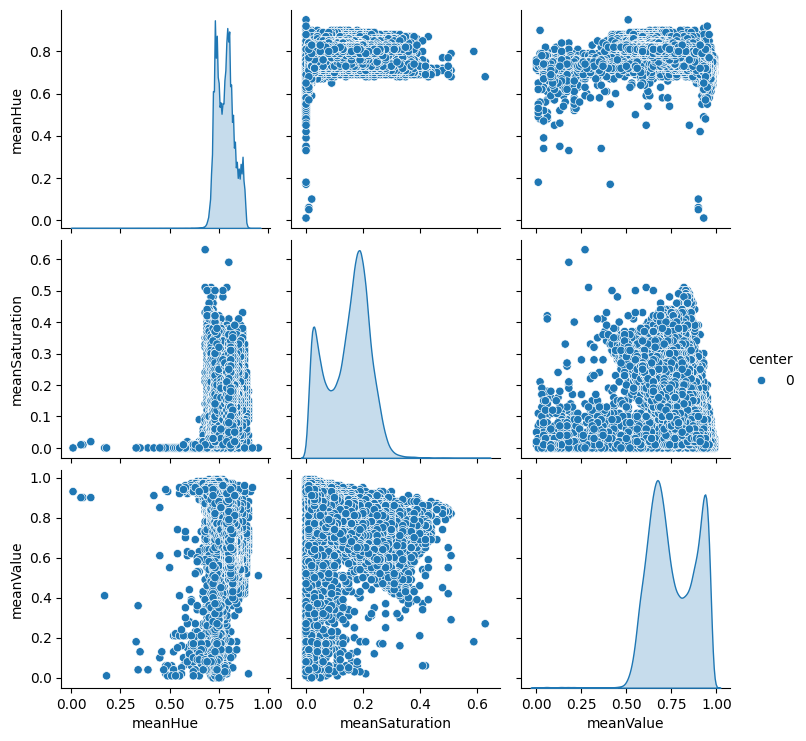

In [11]:
sns.pairplot(data=df_sample, hue='center', vars=['meanHue', 'meanSaturation', 'meanValue'])

In [12]:
normal_count, tumor_count = df_center_0.isTumor.value_counts()
print('Center 0 has {0} tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))

Center 0 has 31 tumors and 232143 normals (total = 232174)
Tumor percentage 0.013352054924323998 %


In [13]:
# tumorLabel이라는 컬럼을 생성하고, TumorPercentage가 75 이상인 패치만 True로 저장

cutOffTumorPercentage = 75
df_center_0['tumorLabel'] = df_center_0['tumorPercentage'] >= cutOffTumorPercentage

In [14]:
df_center_0.describe(include='all')

,patchId,fileName,center,patient,node,centerX,centerY,isTumor,tumorPercentage,tissuePercentage,meanHue,meanSaturation,meanValue,tumorLabel
count,2.321740e+05,232174,232174.0,232174.000000,232174.000000,232174.000000,232174.000000,232174,232174.000000,232174.000000,232174.000000,232174.000000,232174.000000,232174
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,data/training/center_0/patient_004_node_4.tif,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,60454,NaN,NaN,NaN,NaN,NaN,232143,NaN,NaN,NaN,NaN,NaN,232173
mean,3.848939e+15,NaN,0.0,3.847993,2.327573,94551.253732,38589.081913,NaN,0.003304,90.971731,0.780901,0.146951,0.758043,NaN
std,6.578660e+14,NaN,0.0,0.657963,1.395988,31544.326214,16382.599904,NaN,0.399763,20.668975,0.045316,0.074439,0.129657,NaN
min,1.001207e+15,NaN,0.0,1.000000,0.000000,23552.000000,4480.000000,NaN,0.000000,0.300000,0.010000,0.000000,0.000000,NaN
25%,4.000691e+15,NaN,0.0,4.000000,1.000000,73216.000000,25344.000000,NaN,0.000000,100.000000,0.740000,0.090000,0.660000,NaN
50%,4.000861e+15,NaN,0.0,4.000000,3.000000,89344.000000,35712.000000,NaN,0.000000,100.000000,0.780000,0.160000,0.740000,NaN
75%,4.001078e+15,NaN,0.0,4.000000,4.000000,111360.000000,52096.000000,NaN,0.000000,100.000000,0.810000,0.200000,0.880000,NaN


In [15]:
#Lets see how much the tumor label counts now
normal_count, tumor_count = df_center_0.tumorLabel.value_counts()
print('Center 0 has {0} labeled as tumors and {1} normals (total = {2})\nTumor percentage {3} %'.format(tumor_count, 
                                                                                           normal_count, 
                                                                                           tumor_count+normal_count,
                                                                                          100*(tumor_count/(tumor_count + normal_count))))



Center 0 has 1 labeled as tumors and 232173 normals (total = 232174)
Tumor percentage 0.0004307114491717419 %


In [16]:

# Save center df's
df_center_0.to_csv('data/training/center_0.csv')